# Forest cover type prediction in Roosevelt National Forest

# Exploratory Data Analysis

## Problem Description

In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type

This is a Kaggle Competition for novices.

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

Set some global variables like the data folders for training and testing

In [3]:
# Global parameters
#root folder
root_folder='..\..'
#data_folder
data_folder_name='Datasets/RooseveltForest'

# Variable for data directory
DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))

# Both train and test set are in the root data directory
train_path = DATA_PATH
test_path = DATA_PATH


In [3]:
train_path

'C:\\Users\\edumu\\Documents\\Datasets\\RooseveltForest'

### Loading the training dataset

In [6]:
# Reading the csv file with the train data
data = pd.read_csv(train_path+'\\train.csv', sep=',', header=0, index_col=0)
#train_label = pd.read_csv('train_labels.csv', sep=',', header=0,index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_Type1                            15120 non-null int64
Soil_T

- All data columns are integer 64
- There are 15120 rows, no null values in any row
- Wilderness is a categorical variable but it has already been transformed to a one-hot-encode variable
- Soil type has been transform to one-hot-encode variable too

### Data Fields

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.

In [4]:
# Set the numerical variables
numerical_vars=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points']
#Number of categorical values for Wilderness variable
n_cat_for_wild=4
cat_var_wild=['Wilderness_Area'+str(i) for i in range(1,n_cat_for_wild+1)]

#Number of categorical values for Wilderness variable
n_cat_for_soil=40
cat_var_soil=['Soil_Type'+str(i) for i in range(1,n_cat_for_soil+1)]


In [7]:
# Describe the numerical variables
# First insight of data
data[numerical_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


- Some columns has 0 value, they could be missing value
- Some columns has negative values, they could be missing values


In [9]:
# Show the nulll values for some relevant variables
print('Aspect=0 in rows:'+str(len(data[data['Aspect']==0].index)))
print('Slope=0 in rows:'+str(len(data[data['Slope']==0].index)))
print('Horizontal_Distance_To_Hydrology=0 in rows:'+str(len(data[data['Horizontal_Distance_To_Hydrology']==0].index)))
print('Vertical_Distance_To_Hydrology=0 in rows:'+str(len(data[data['Vertical_Distance_To_Hydrology']<=0].index)))
print('Horizontal_Distance_To_Roadways=0 in rows:'+str(len(data[data['Horizontal_Distance_To_Roadways']<=0].index)))

Aspect=0 in rows:110
Slope=0 in rows:5
Horizontal_Distance_To_Hydrology=0 in rows:1590
Vertical_Distance_To_Hydrology=0 in rows:3029
Horizontal_Distance_To_Roadways=0 in rows:3


In [48]:
data[cat_var_wild].describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.237897,0.033003,0.419907,0.309193
std,0.425810,0.178649,0.493560,0.462176
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


## Data Analysis

- There are some outliers for Slope features, but it does not seem to be relevant

In [29]:
#Get the Cover Type values sorted
#We are defining an 3 x 4 matrix to help us plotting features
plot_vars=np.array([['Elevation','Aspect','Slope',None],['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points'],['Hillshade_9am','Hillshade_Noon','Hillshade_3pm',None]])
plot_vars.shape

(3, 4)

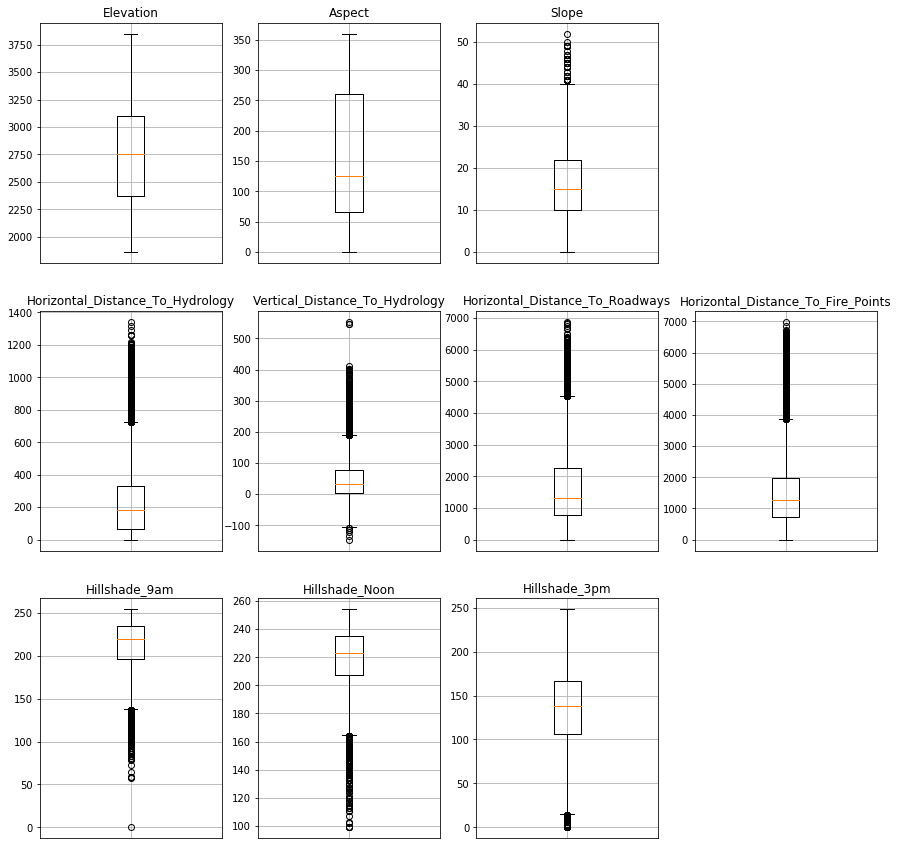

In [32]:
# Boxplots for appicant featrures
f, axes = plt.subplots(3, 4, sharey=False, figsize=(15,15))
#fig1, ax1 = plt.subplots()
for i in range(plot_vars.shape[0]):
    for j in range(plot_vars.shape[1]):
        if plot_vars[i,j]!=None:
            axes[i,j].set_title(plot_vars[i,j])
            axes[i,j].grid(True)
            axes[i,j].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            axes[i,j].boxplot(data[plot_vars[i,j]])
        else:
            axes[i,j].set_visible(False)

plt.show()

### Histograms for numerical features

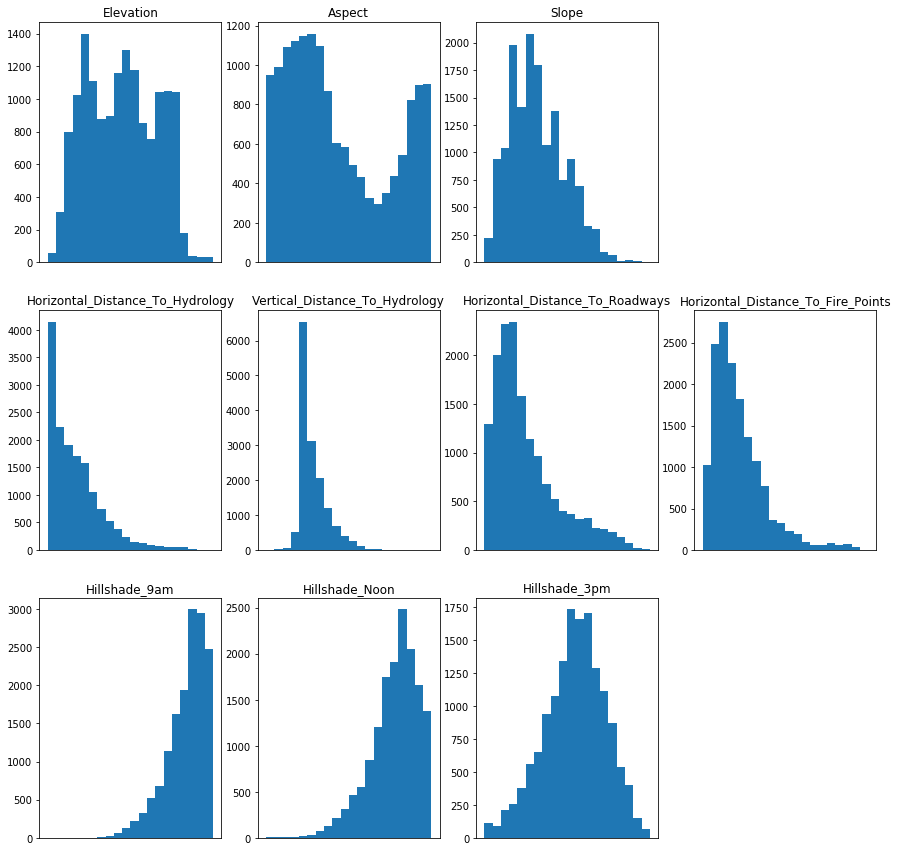

In [34]:
# Histograms for appicant featrures
f, axes = plt.subplots(3, 4, sharey=False, figsize=(15,15))
#fig1, ax1 = plt.subplots()
for i in range(plot_vars.shape[0]):
    for j in range(plot_vars.shape[1]):
        if plot_vars[i,j]!=None:
            axes[i,j].set_title(plot_vars[i,j])
            axes[i,j].grid(False)
            axes[i,j].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            axes[i,j].hist(data[plot_vars[i,j]],bins=20)
        else:
            axes[i,j].set_visible(False)

plt.show()

- All columns about distances are right skewed distribution
- Hillshade 9am and Noon columns are left skewed distribution
- Hillshade 3am is a normal distribution

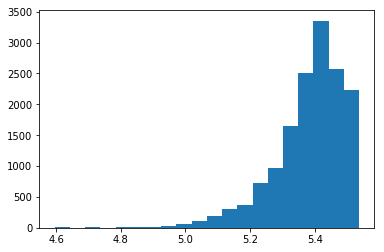

In [12]:
plt.hist(np.log(data['Hillshade_Noon']),bins=20)
plt.show()

## Data Analysis for categorical variables

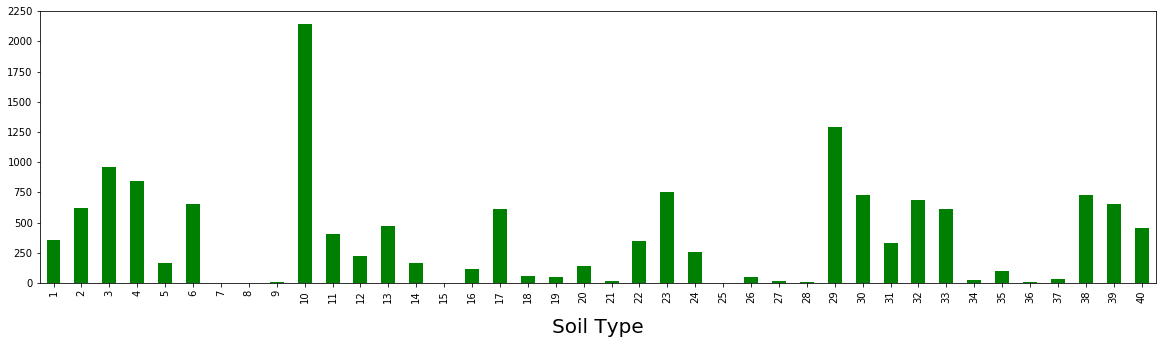

In [44]:
root_label='Soil_Type'
labels=[i[len(root_label):] for i in cat_var_soil]
f, ax = plt.subplots(2,1,figsize=(20,5))
data[cat_var_soil].sum().plot(kind='bar',label='Soil Type',color='g')
ax.set_xticklabels(labels)
ax.set_xlabel('Soil Type',labelpad =15,fontsize=20)
plt.show()

- Soil Types 7, 8, 15, 25 seems to be irrelevant
- Soil Types 9, 21, 27, 28 and 36 are very low, they might be useless

In [50]:
# Count the number of unique values in each category
num_val = data[cat_var_soil].nunique()
num_val

Soil_Type1     2
Soil_Type2     2
Soil_Type3     2
Soil_Type4     2
Soil_Type5     2
Soil_Type6     2
Soil_Type7     1
Soil_Type8     2
Soil_Type9     2
Soil_Type10    2
Soil_Type11    2
Soil_Type12    2
Soil_Type13    2
Soil_Type14    2
Soil_Type15    1
Soil_Type16    2
Soil_Type17    2
Soil_Type18    2
Soil_Type19    2
Soil_Type20    2
Soil_Type21    2
Soil_Type22    2
Soil_Type23    2
Soil_Type24    2
Soil_Type25    2
Soil_Type26    2
Soil_Type27    2
Soil_Type28    2
Soil_Type29    2
Soil_Type30    2
Soil_Type31    2
Soil_Type32    2
Soil_Type33    2
Soil_Type34    2
Soil_Type35    2
Soil_Type36    2
Soil_Type37    2
Soil_Type38    2
Soil_Type39    2
Soil_Type40    2
dtype: int64

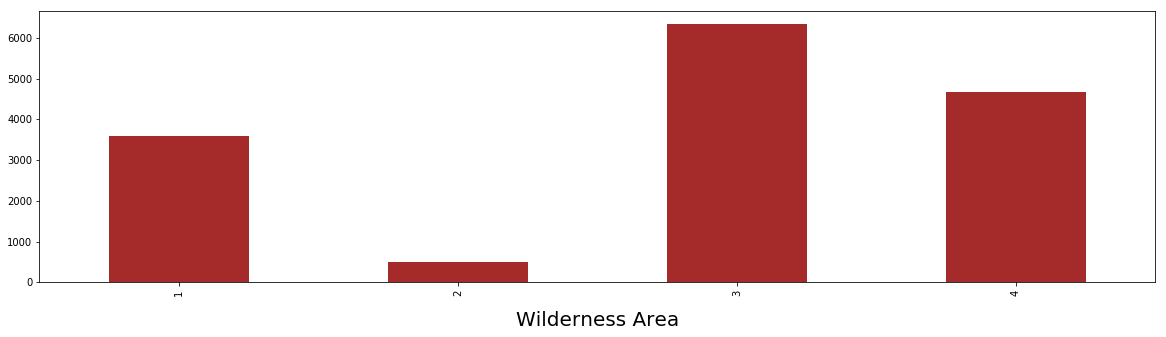

In [46]:
root_label='Wilderness_Area'
labels=[i[len(root_label):] for i in cat_var_wild]

f, ax = plt.subplots(figsize=(20,5))
data[cat_var_wild].sum().plot(kind='bar',label='Wilderness Area',color='brown')
ax.set_xticklabels(labels)
ax.set_xlabel('Wilderness Area',labelpad =15,fontsize=20)
plt.show()

- Wilderness Area 2 is very low, is an unbalance feature. We need to study its impact in the target value

- Wilderness type is an unbalance column: about 500 rows are type 2, 4000 are type 1, 5000 are type 4 and 6000 are type 3

- Type 7 and 15 are useless, they do not provide any information

## Analyze the target data distribution

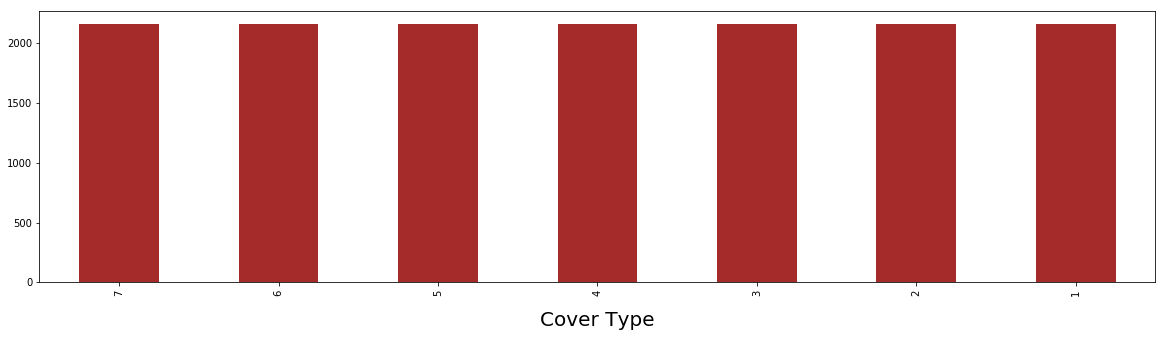

In [58]:
f, ax = plt.subplots(figsize=(20,5))
data['Cover_Type'].value_counts().plot(kind='bar',label='Cover type',color='brown')
#ax.set_xticklabels(labels)
ax.set_xlabel('Cover Type',labelpad =15,fontsize=20)
plt.show()

- Data label is completely balanced: 2160 rows in every value

## Let's explore features values respect to target

In [64]:
#Get the Cover Type values sorted
values=data['Cover_Type'].unique()
values.sort()
plot_vars=np.array([['Elevation','Aspect','Slope',None],['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points'],['Hillshade_9am','Hillshade_Noon','Hillshade_3pm',None]])

plot_vars.shape

(3, 4)

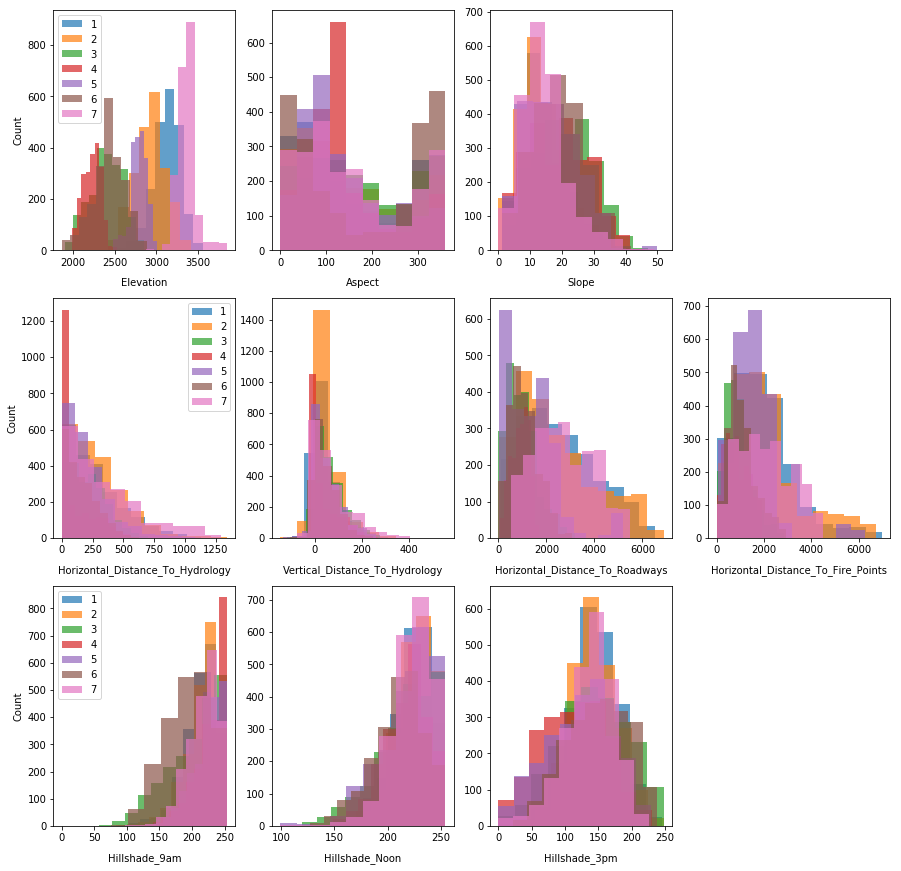

In [63]:
# Boxplots for appicant featrures
f, axes = plt.subplots(3, 4, sharey=False, figsize=(15,15))
#fig1, ax1 = plt.subplots()
for i in range(plot_vars.shape[0]):
    for j in range(plot_vars.shape[1]):
        if plot_vars[i,j]!=None:
            for k in values:
                axes[i,j].hist(data[data['Cover_Type']==k][plot_vars[i,j]],alpha=0.7,histtype='bar',bins=10,label=str(k))
                
            axes[i,j].set_xlabel(plot_vars[i,j],labelpad=10,fontsize=10)
            if j==0:
                axes[i,j].set_ylabel('Count')
                axes[i,j].legend()
        else:
            axes[i,j].set_visible(False)

plt.show()

- Elevation feature seems to be a good predictor. We can observe that when elevation raises the cover type is changing by range
- Most cover type 4 is a aspect range of 100-150
- Very low horizontal distance to hidrology indicates cover type 4
- But for some features the cover types are spread along the whole range (Slope,distances, Hillshade Noon and Hillshade 3pm)


### Wilderness Area

<function matplotlib.pyplot.show>

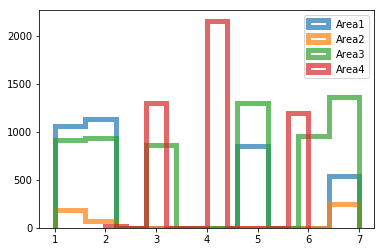

In [26]:
Area1 = data[data['Wilderness_Area1']==1]
Area2 = data[data['Wilderness_Area2']==1]
Area3 = data[data['Wilderness_Area3']==1]
Area4 = data[data['Wilderness_Area4']==1]

plt.hist(Area1['Cover_Type'],label='Area1',histtype='step',alpha=0.7,linewidth=5)
plt.hist(Area2['Cover_Type'],label='Area2',histtype='step',alpha=0.7,linewidth=5)
plt.hist(Area3['Cover_Type'],label='Area3',histtype='step',alpha=0.7,linewidth=5)
plt.hist(Area4['Cover_Type'],label='Area4',histtype='step',alpha=0.7,linewidth=5)
plt.legend()
plt.show

<function matplotlib.pyplot.show>

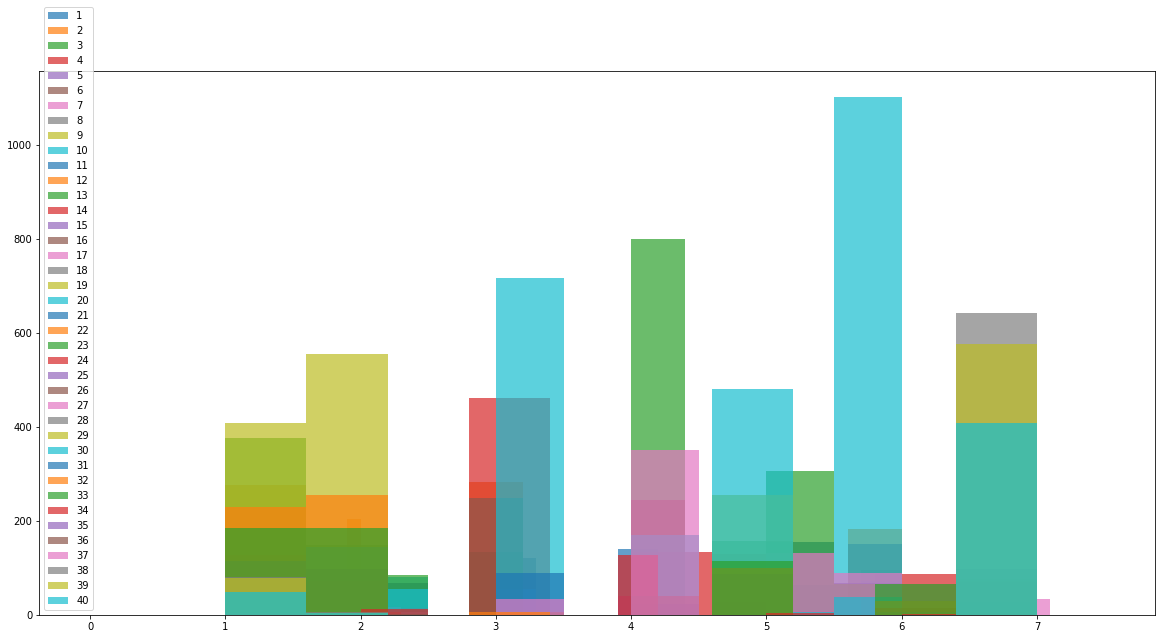

In [70]:
plt.figure(figsize =(20,10)) 

for i in cat_var_soil:
    plt.hist(data[data[i]==1]['Cover_Type'],label=i[9:],histtype='bar',alpha=0.7,linewidth=5)
     
plt.legend()
plt.show

### Analyzing relations between variables and correlations 

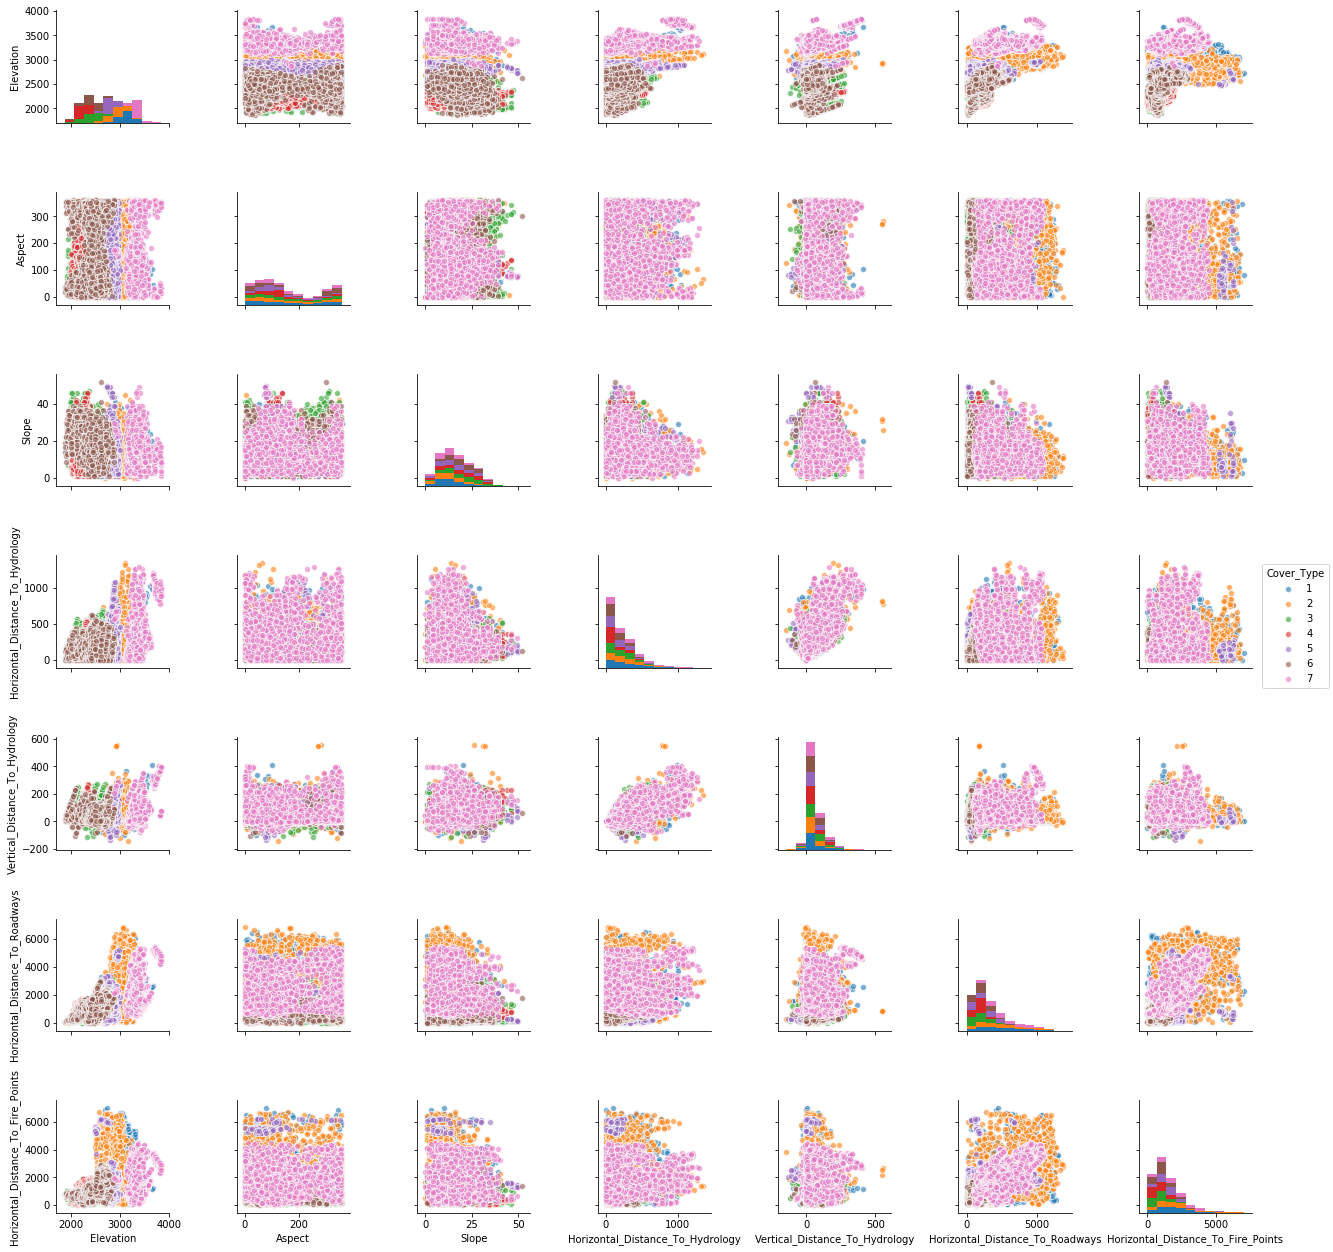

In [11]:
import seaborn as sns

sns.pairplot(data[numerical_vars+['Cover_Type']], vars = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points'],hue='Cover_Type',plot_kws = {'alpha': 0.6})
#pd.plotting.scatter_matrix(train_data_nona, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()


- As we saw previously, Elevation is probably the more discriminative feature
- There are not many correlation relationships between features except for horizontal and vertical distances to hidro.

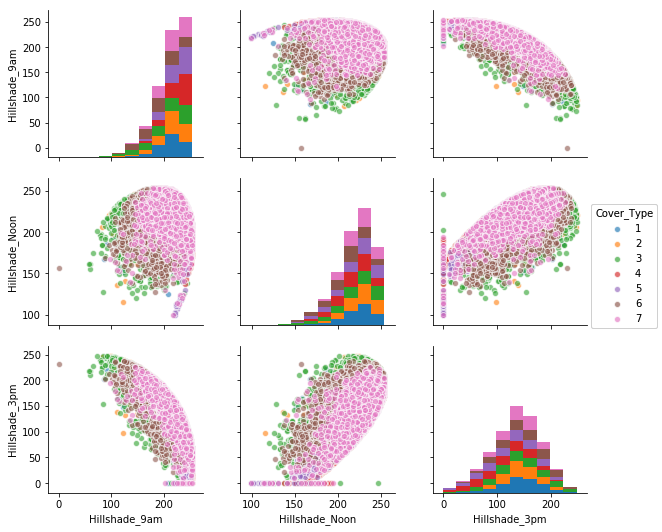

In [72]:
import seaborn as sns

g=sns.pairplot(data[numerical_vars+['Cover_Type']], vars = ['Hillshade_9am','Hillshade_Noon','Hillshade_3pm'],hue='Cover_Type',plot_kws = {'alpha': 0.6})
#pd.plotting.scatter_matrix(train_data_nona, alpha=0.2, figsize=(6, 6), diagonal='kde')
g = g.add_legend()
plt.show()


- We can see that these features are string correlated, Hillshade 9am and 3am and Noon and 3am.

Lets dive into the correlation matrix

In [20]:
cols.values[:-1][:3]

array(['Cover_Type', 'Soil_Type38', 'Soil_Type39'], dtype=object)

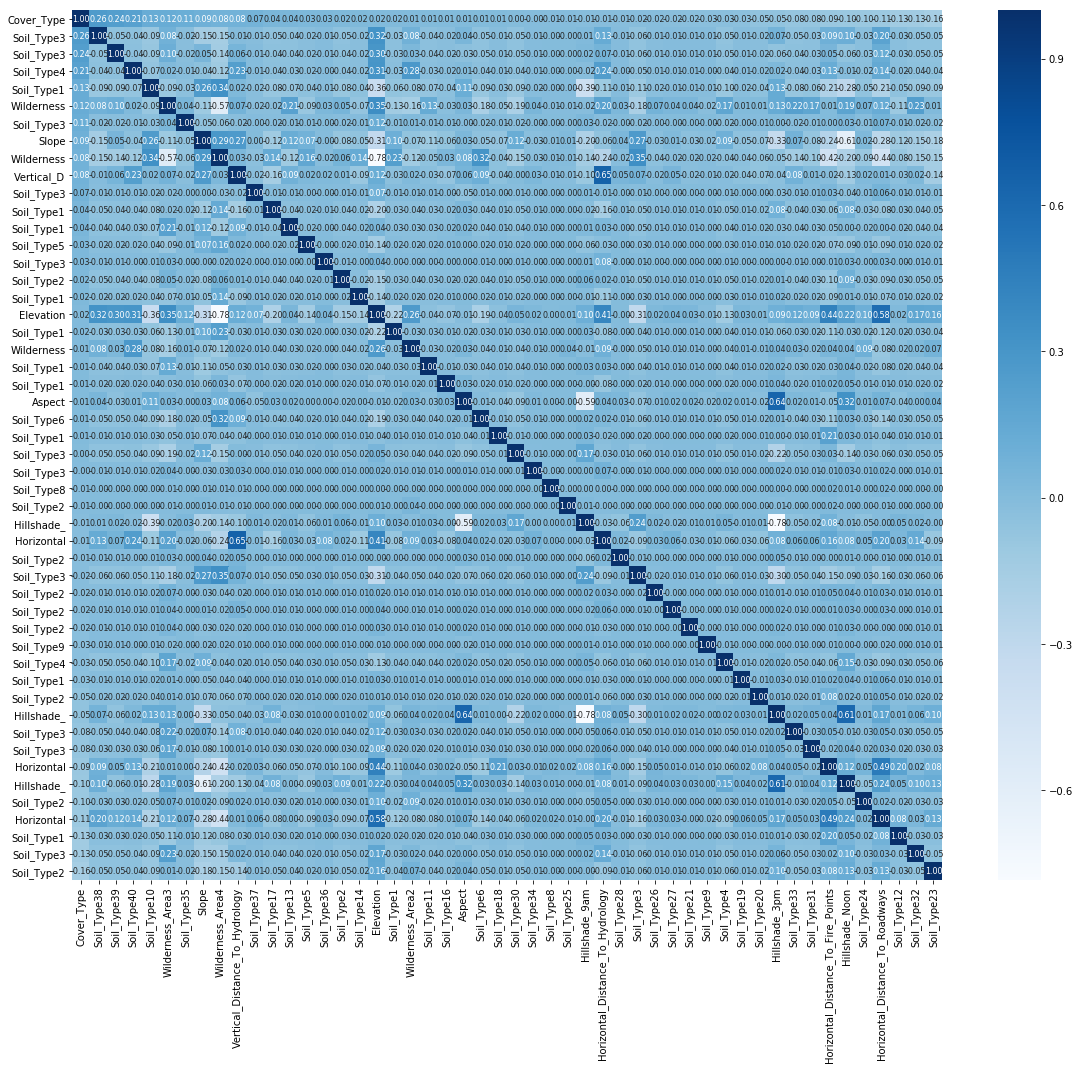

In [23]:
plt.subplots(figsize=(20, 16))
k = 50 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'Cover_Type')['Cover_Type'].index

cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 8}, cmap='Blues',
                 yticklabels=[x[0:10] for x in cols.values], xticklabels=cols.values)
plt.show()
